# Titanic: Machine Learning from Disaster

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

### Data importing and visualization

In [2]:
# importing the training data
training_data = pd.read_csv('D:\\Not yours\\Titanic\\train.csv')

In [3]:
# importing Test data
test_data = pd.read_csv('D:\\Not yours\\Titanic\\test.csv')

In [4]:
# exploring head of data
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# to view the characteristics of every column from the data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# getting shape of data
training_data.shape

(891, 12)

In [7]:
# check for null values
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# data features of every column
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


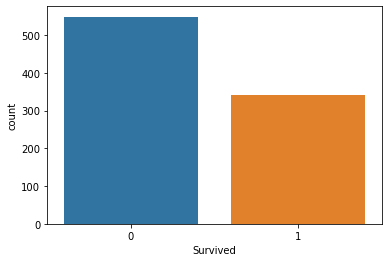

In [9]:
sns.countplot(x= 'Survived', data = training_data)

### Data preprocessing & missing data handling

In [10]:
# combining training data and test data to do the processing on both of them.
combined_data = pd.concat([training_data, test_data])

In [11]:
# resetting index after concatination
combined_data.reset_index(inplace = True, drop = True)

In [12]:
# droppimg the useless data
combined_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [13]:
# exploring head of data after dropping 4 columns
combined_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
# getting a relation between 'Parch' and 'Age' to get better prediction of missing 'Age' values.
combined_data.groupby('Parch')['Age'].mean()

Parch
0    31.969401
1    24.965625
2    18.975979
3    38.875000
4    47.600000
5    39.333333
6    41.500000
9          NaN
Name: Age, dtype: float64

In [15]:
parch_grouped = combined_data.groupby(['Parch'])
parch_grouped.mean()

def age_approx(colms):
    age = colms[0]
    parch = colms[1]
    
    if pd.isnull(age):
        if parch == 0:
            return 32
        elif parch == 1:
            return 24
        elif parch == 2:
            return 17
        elif parch == 3:
            return 33
        elif parch == 4:
            return 45
        else:
            return 30
    else:
        return age

In [16]:
# appling the age_approx function to our data
combined_data['Age'] = combined_data[['Age', 'Parch']].apply(age_approx, axis = 1)

In [17]:
# filling the missing values of 'Embarked' with the most frequent one 'S' 
combined_data.Embarked.fillna('S', inplace=True)

In [18]:
# filling the missing values of 'Fare' with the median 
combined_data.Fare.fillna(combined_data.iloc[:891].Fare.mean(), inplace=True)

In [19]:
# get the titles from names as a bonus data
combined_data['Title'] = combined_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [20]:
combined_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [21]:
# view the unique titles to handle
set(combined_data['Title'])

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [22]:
# the map to the 'Titles'
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [23]:
# mapping the titles to a simpler categories and more obvious ones.
combined_data['Title'] = combined_data['Title'].map(Title_Dictionary)

In [24]:
combined_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [25]:
# dealing with categorical data 'Sex'
le_sex = LabelEncoder()
combined_data['Sex'] = le_sex.fit_transform(combined_data['Sex'])

In [26]:
# dealing with categorical data 'Embarked'
embarked_one_hot = pd.get_dummies(combined_data['Embarked'], prefix='Embarked')
embarked_DF = pd.DataFrame(embarked_one_hot)
# concatenating the one hotted embarked with our data
combined_data.drop(['Embarked'], inplace = True, axis = 1)
combined_data = pd.concat([combined_data, embarked_DF], axis = 1)

In [27]:
# dealing with categorical data 'Titles'
titles_one_hot = pd.get_dummies(combined_data['Title'], prefix='Title')
titles_DF = pd.DataFrame(titles_one_hot)
# concatenating the one hotted embarked with our data
combined_data.drop(['Title', 'Name'], inplace = True, axis = 1)
combined_data = pd.concat([combined_data, titles_DF], axis = 1)

In [28]:
combined_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0
1,1.0,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0
2,1.0,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0
3,1.0,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0
4,0.0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,8.0500,0,0,1,0,0,1,0,0,0
1305,NaN,1,0,39.0,0,0,108.9000,1,0,0,0,0,0,0,0,1
1306,NaN,3,1,38.5,0,0,7.2500,0,0,1,0,0,1,0,0,0
1307,NaN,3,1,32.0,0,0,8.0500,0,0,1,0,0,1,0,0,0


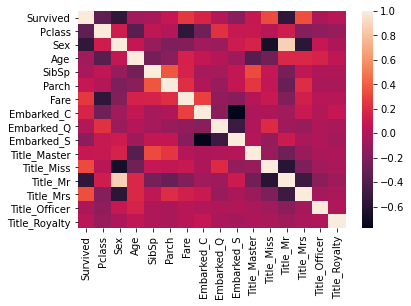

In [29]:
# exploring the correlation between features
sns.heatmap(combined_data.corr())

In [30]:
# dropping the features that have high correlations
dropping = combined_data.drop(['Embarked_S', 'Fare', 'Title_Miss'], axis = 1)
dropping

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Title_Master,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,3,1,22.0,1,0,0,0,0,1,0,0,0
1,1.0,1,0,38.0,1,0,1,0,0,0,1,0,0
2,1.0,3,0,26.0,0,0,0,0,0,0,0,0,0
3,1.0,1,0,35.0,1,0,0,0,0,0,1,0,0
4,0.0,3,1,35.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,0,0,0,1,0,0,0
1305,NaN,1,0,39.0,0,0,1,0,0,0,0,0,1
1306,NaN,3,1,38.5,0,0,0,0,0,1,0,0,0
1307,NaN,3,1,32.0,0,0,0,0,0,1,0,0,0


In [31]:
# splitting the unlabeled data from the labeled
training_set = dropping.iloc[:891,:]
unlabeled_data = dropping.iloc[891:,:]

In [32]:
training_set.shape

(891, 13)

In [33]:
unlabeled_data.shape

(418, 13)

In [34]:
unlabeled_data_index = unlabeled_data.index.values +1 
unlabeled_data.drop('Survived', axis = 1, inplace = True)

C:\Users\Gladit\anaconda3\envs\mylastenv\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
# splitting data to training and testing
X_train, X_test, y_train, y_test = train_test_split(training_set.drop('Survived', axis = 1), training_set['Survived'], test_size = 0.2)

In [36]:
# building the model
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [37]:
# evaluating the model
score = NB.score(X_test,y_test)
print ('CV score = {0}'.format(score))
print ('****')
score = NB.score(X_train,y_train)
print ('CV score = {0}'.format(score))
print ('****')

CV score = 0.8156424581005587
****
CV score = 0.8075842696629213
****


In [38]:
labels = NB.predict(unlabeled_data)
unlabeled_data_index = pd.DataFrame(unlabeled_data_index)
labels = pd.DataFrame(labels)
labels = labels.astype(int)

In [39]:
submission = pd.concat([unlabeled_data_index, labels], axis = 1)
submission.columns = ['PassengerId', 'survived']

In [40]:
submission

,PassengerId,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
# saving the predicted data in the file to be submitted
submission.to_csv('D:\\Not yours\\Titanic\\submission.csv', index= False)